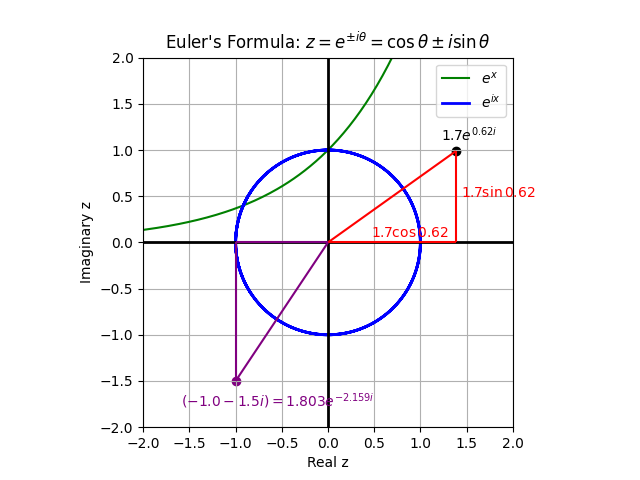

In [1]:
"""euler_formula.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_euler_formula(ax: Axes) -> None:
    # Plot y = e^xi
    x: NDArray[np.float_] = np.linspace(-10, 10, 1000, endpoint=True)
    z: NDArray[np.float_] = np.zeros(len(x), dtype=complex)

    for idx, val in enumerate(x):
        z[idx] = np.exp(complex(0, val))

    # fmt: off
    ax.plot(np.real(z), np.imag(z), color="blue",
            linewidth=2, label=r"$e^{i x}$")
    # fmt: on


def plot_exponential_curve(ax: Axes) -> None:
    # Plot y = e^x
    x: NDArray[np.float_] = np.linspace(-10, 10, 1000, endpoint=True)
    ax.plot(x, np.exp(x), color="green", label=r"$e^x$")


def plot_complex_point1(ax: Axes) -> None:
    # Plot a complex exponential on this Argand diagram
    z: float = 1.7 * np.exp(complex(0, 0.62))
    x: float = np.real(z)
    y: float = np.imag(z)
    ax.scatter(x, y, color="black")

    line_hypot: list[tuple[float, float]] = [(0, 0), (x, y)]
    line_opp: list[tuple[float, float]] = [(x, 0), (x, y)]
    line_adj: list[tuple[float, float]] = [(0, 0), (x, 0)]
    lc = LineCollection([line_hypot, line_opp, line_adj],
                        color="red", zorder=3)
    ax.add_collection(lc)  # type: ignore

    # fmt: off
    ax.annotate(r"$1.7e^{0.62 i}$", xy=(x, y), #size=15,
                color="black", xytext=(-15, 10), textcoords="offset pixels")

    ax.annotate(r"$1.7\sin{0.62}$", xy=(x, y / 2),
                color="red", xytext=(5, 0), textcoords="offset pixels")

    ax.annotate(r"$1.7\cos{0.62}$", xy=(x / 3, 0),
                color="red", xytext=(0, 5), textcoords="offset pixels")
    # fmt: on


def plot_complex_point2(ax: Axes) -> None:
    # Plot -1-1.5j as complex exponential
    x: float = -1.0
    y: float = -1.5
    z = complex(x, y)
    hypot = np.hypot(np.real(z), np.imag(z))
    theta: float = np.arctan(np.imag(z) / np.real(z)) - np.pi
    ax.scatter(-1, -1.5, color="purple")
    line_hypot: list[tuple[float, float]] = [(0, 0), (x, y)]
    line_opp: list[tuple[float, float]] = [(x, 0), (x, y)]
    line_adj: list[tuple[float, float]] = [(0, 0), (x, 0)]
    lc = LineCollection([line_hypot, line_opp, line_adj],
                        color="purple", zorder=3)
    ax.add_collection(lc)  # type: ignore
    # fmt: off
    ax.annotate(
        rf"$({x}{y}i)={hypot:.3f}e^{{{theta:.3f}i}}$", xy=(x, y),
        color="purple", xytext=(-55, -25), textcoords="offset pixels")
    # fmt: on


def decorate_plot(ax: Axes) -> None:
    # Decorate plot
    ax.grid()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_aspect("equal")
    ax.axvline(x=0, color="black", linewidth=2)
    ax.axhline(y=0, color="black", linewidth=2)
    ax.set_title(
        r"Euler's Formula: $z = e^{\pm i\theta}=\cos{\theta}\pm i\sin{\theta}$"
    )
    ax.set_xlabel("Real z")
    ax.set_ylabel("Imaginary z")
    ax.legend(loc="best")


def main() -> None:
    plt.close("all")
    plt.figure(" ")
    ax: Axes = plt.axes()

    plot_exponential_curve(ax)
    plot_euler_formula(ax)
    plot_complex_point1(ax)
    plot_complex_point2(ax)

    decorate_plot(ax)

    plt.show()


main()
